### **Tratamento de los datos faltantes**

El data set presenta un alto número de valores nulos o faltantes, por lo que antes de pasar al modelado de Machine Learning, debemos trabajar para reducir al mínimo esos valores. 

A continuación probaremos algunas técnicas para mejorar la calidad del dataset


In [1]:
# Importar librerías

import pandas as pd 
import numpy as np
import missingno as msno


In [2]:
df = pd.read_csv('/home/karim/Desktop/Data Science/Coderhouse/Coderhouse_Data_Science/world_development_indicator_1960-2023.csv', )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17029 entries, 0 to 17028
Data columns (total 63 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Country Name                                                                                          17026 non-null  object 
 1   Country Code                                                                                          17024 non-null  object 
 2   Time                                                                                                  17024 non-null  float64
 3   Time Code                                                                                             17024 non-null  object 
 4   Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]               

Por algún motivo los valores nulos no están reflejados.

In [3]:
df.head(30)

,Country Name,Country Code,Time,Time Code,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],Access to electricity (% of population) [EG.ELC.ACCS.ZS],Agricultural irrigated land (% of total agricultural land) [AG.LND.IRIG.AG.ZS],Agricultural land (% of land area) [AG.LND.AGRI.ZS],Agricultural land (sq. km) [AG.LND.AGRI.K2],Agricultural methane emissions (% of total) [EN.ATM.METH.AG.ZS],...,Surface area (sq. km) [AG.SRF.TOTL.K2],Terrestrial and marine protected areas (% of total territorial area) [ER.PTD.TOTL.ZS],Terrestrial protected areas (% of total land area) [ER.LND.PTLD.ZS],Total fisheries production (metric tons) [ER.FSH.PROD.MT],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE],Urban land area (sq. km) [AG.LND.TOTL.UR.K2],Urban population [SP.URB.TOTL],Urban population (% of total population) [SP.URB.TOTL.IN.ZS],Urban population growth (annual %) [SP.URB.GROW],"Population, total [SP.POP.TOTL]"
0,Afghanistan,AFG,1960.0,YR1960,..,..,..,..,..,..,...,..,..,..,200,..,..,724373,8.401,..,8622466
1,Afghanistan,AFG,1961.0,YR1961,..,..,..,57.878355794735,377500,..,...,652860,..,..,300,..,..,763336,8.684,5.23918482345135,8790140
2,Afghanistan,AFG,1962.0,YR1962,..,..,..,57.9550158686353,378000,..,...,652860,..,..,300,..,..,805062,8.976,5.32209917624658,8969047
3,Afghanistan,AFG,1963.0,YR1963,..,..,..,58.0316759425356,378500,..,...,652860,..,..,300,..,..,849446,9.276,5.36650792012084,9157465
4,Afghanistan,AFG,1964.0,YR1964,..,..,..,58.1160020238259,379050,..,...,652860,..,..,300,..,..,896820,9.586,5.42708007382488,9355514
5,Afghanistan,AFG,1965.0,YR1965,..,..,..,58.123668031216,379100,..,...,652860,..,..,300,..,..,947332,9.904,5.4794439502632,9565147
6,Afghanistan,AFG,1966.0,YR1966,..,..,..,58.1926620977263,379550,..,...,652860,..,..,300,..,..,1001109,10.233,5.5214051967495,9783147
7,Afghanistan,AFG,1967.0,YR1967,..,..,..,58.2294589331984,379790,..,...,652860,..,..,400,..,..,1058060,10.57,5.53286570893914,10010030
8,Afghanistan,AFG,1968.0,YR1968,..,..,..,58.2309921346764,379800,..,...,652860,..,..,400,..,..,1118853,10.918,5.58670108049647,10247780
9,Afghanistan,AFG,1969.0,YR1969,..,..,..,58.2555233583245,379960,..,...,652860,..,..,460,..,..,1183254,11.275,5.59642169101367,10494489


al hacer un head extendido noto que los valores faltantes están representados como "..", los reemplazaré por nan de numpy


In [4]:
df.replace(['..', '0', '0.0'], np.nan, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17029 entries, 0 to 17028
Data columns (total 63 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Country Name                                                                                          17026 non-null  object 
 1   Country Code                                                                                          17024 non-null  object 
 2   Time                                                                                                  17024 non-null  float64
 3   Time Code                                                                                             17024 non-null  object 
 4   Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]               

In [5]:
# Contar valores nulos por columna
print(df.isnull().sum())


Country Name                                                                                 3
Country Code                                                                                 5
Time                                                                                         5
Time Code                                                                                    5
Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]    11833
                                                                                         ...  
Urban land area (sq. km) [AG.LND.TOTL.UR.K2]                                             16248
Urban population [SP.URB.TOTL]                                                             490
Urban population (% of total population) [SP.URB.TOTL.IN.ZS]                               460
Urban population growth (annual %) [SP.URB.GROW]                                           754
Population, total [SP.POP.TOTL]                   

In [6]:
df.head()

,Country Name,Country Code,Time,Time Code,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],Access to electricity (% of population) [EG.ELC.ACCS.ZS],Agricultural irrigated land (% of total agricultural land) [AG.LND.IRIG.AG.ZS],Agricultural land (% of land area) [AG.LND.AGRI.ZS],Agricultural land (sq. km) [AG.LND.AGRI.K2],Agricultural methane emissions (% of total) [EN.ATM.METH.AG.ZS],...,Surface area (sq. km) [AG.SRF.TOTL.K2],Terrestrial and marine protected areas (% of total territorial area) [ER.PTD.TOTL.ZS],Terrestrial protected areas (% of total land area) [ER.LND.PTLD.ZS],Total fisheries production (metric tons) [ER.FSH.PROD.MT],Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE],Urban land area (sq. km) [AG.LND.TOTL.UR.K2],Urban population [SP.URB.TOTL],Urban population (% of total population) [SP.URB.TOTL.IN.ZS],Urban population growth (annual %) [SP.URB.GROW],"Population, total [SP.POP.TOTL]"
0,Afghanistan,AFG,1960.0,YR1960,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,200,NaN,NaN,724373,8.401,NaN,8622466
1,Afghanistan,AFG,1961.0,YR1961,NaN,NaN,NaN,57.878355794735,377500,NaN,...,652860,NaN,NaN,300,NaN,NaN,763336,8.684,5.23918482345135,8790140
2,Afghanistan,AFG,1962.0,YR1962,NaN,NaN,NaN,57.9550158686353,378000,NaN,...,652860,NaN,NaN,300,NaN,NaN,805062,8.976,5.32209917624658,8969047
3,Afghanistan,AFG,1963.0,YR1963,NaN,NaN,NaN,58.0316759425356,378500,NaN,...,652860,NaN,NaN,300,NaN,NaN,849446,9.276,5.36650792012084,9157465
4,Afghanistan,AFG,1964.0,YR1964,NaN,NaN,NaN,58.1160020238259,379050,NaN,...,652860,NaN,NaN,300,NaN,NaN,896820,9.586,5.42708007382488,9355514


In [7]:

# Configurar la opción para mostrar todas las filas
pd.set_option('display.max_rows', None)


df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Country Name,17026,268,Afghanistan,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country Code,17024,266,AFG,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,17024.0,NaN,NaN,NaN,1991.5,18.473496,1960.0,1975.75,1991.5,2007.25,2023.0
Time Code,17024,64,YR1960,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],5196,1847,100,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Access to electricity (% of population) [EG.ELC.ACCS.ZS],7348,4327,100,2531,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agricultural irrigated land (% of total agricultural land) [AG.LND.IRIG.AG.ZS],1055,1015,5.15692451289231,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agricultural land (% of land area) [AG.LND.AGRI.ZS],14714,10880,16.6666666666667,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agricultural land (sq. km) [AG.LND.AGRI.K2],15616,10013,90,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agricultural methane emissions (% of total) [EN.ATM.METH.AG.ZS],8304,7903,50,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# conocer el porcetaje de MV por columnas

nulos = df.isnull()

porcenulos= nulos.mean() * 100

print(porcenulos.sort_values(ascending= False))

Droughts, floods, extreme temperatures (% of population, average 1990-2009) [EN.CLC.MDAT.ZS]            99.072171
Plant species (higher), threatened [EN.HPT.THRD.NO]                                                     98.584767
Mammal species, threatened [EN.MAM.THRD.NO]                                                             98.490810
Fish species, threatened [EN.FSH.THRD.NO]                                                               98.484937
Bird species, threatened [EN.BIR.THRD.NO]                                                               98.479065
Urban land area (sq. km) [AG.LND.TOTL.UR.K2]                                                            95.413706
Rural land area (sq. km) [AG.LND.TOTL.RU.K2]                                                            95.366727
Agricultural irrigated land (% of total agricultural land) [AG.LND.IRIG.AG.ZS]                          93.804686
Terrestrial and marine protected areas (% of total territorial area) [ER.PTD.TOTL.ZS]   

<Axes: >

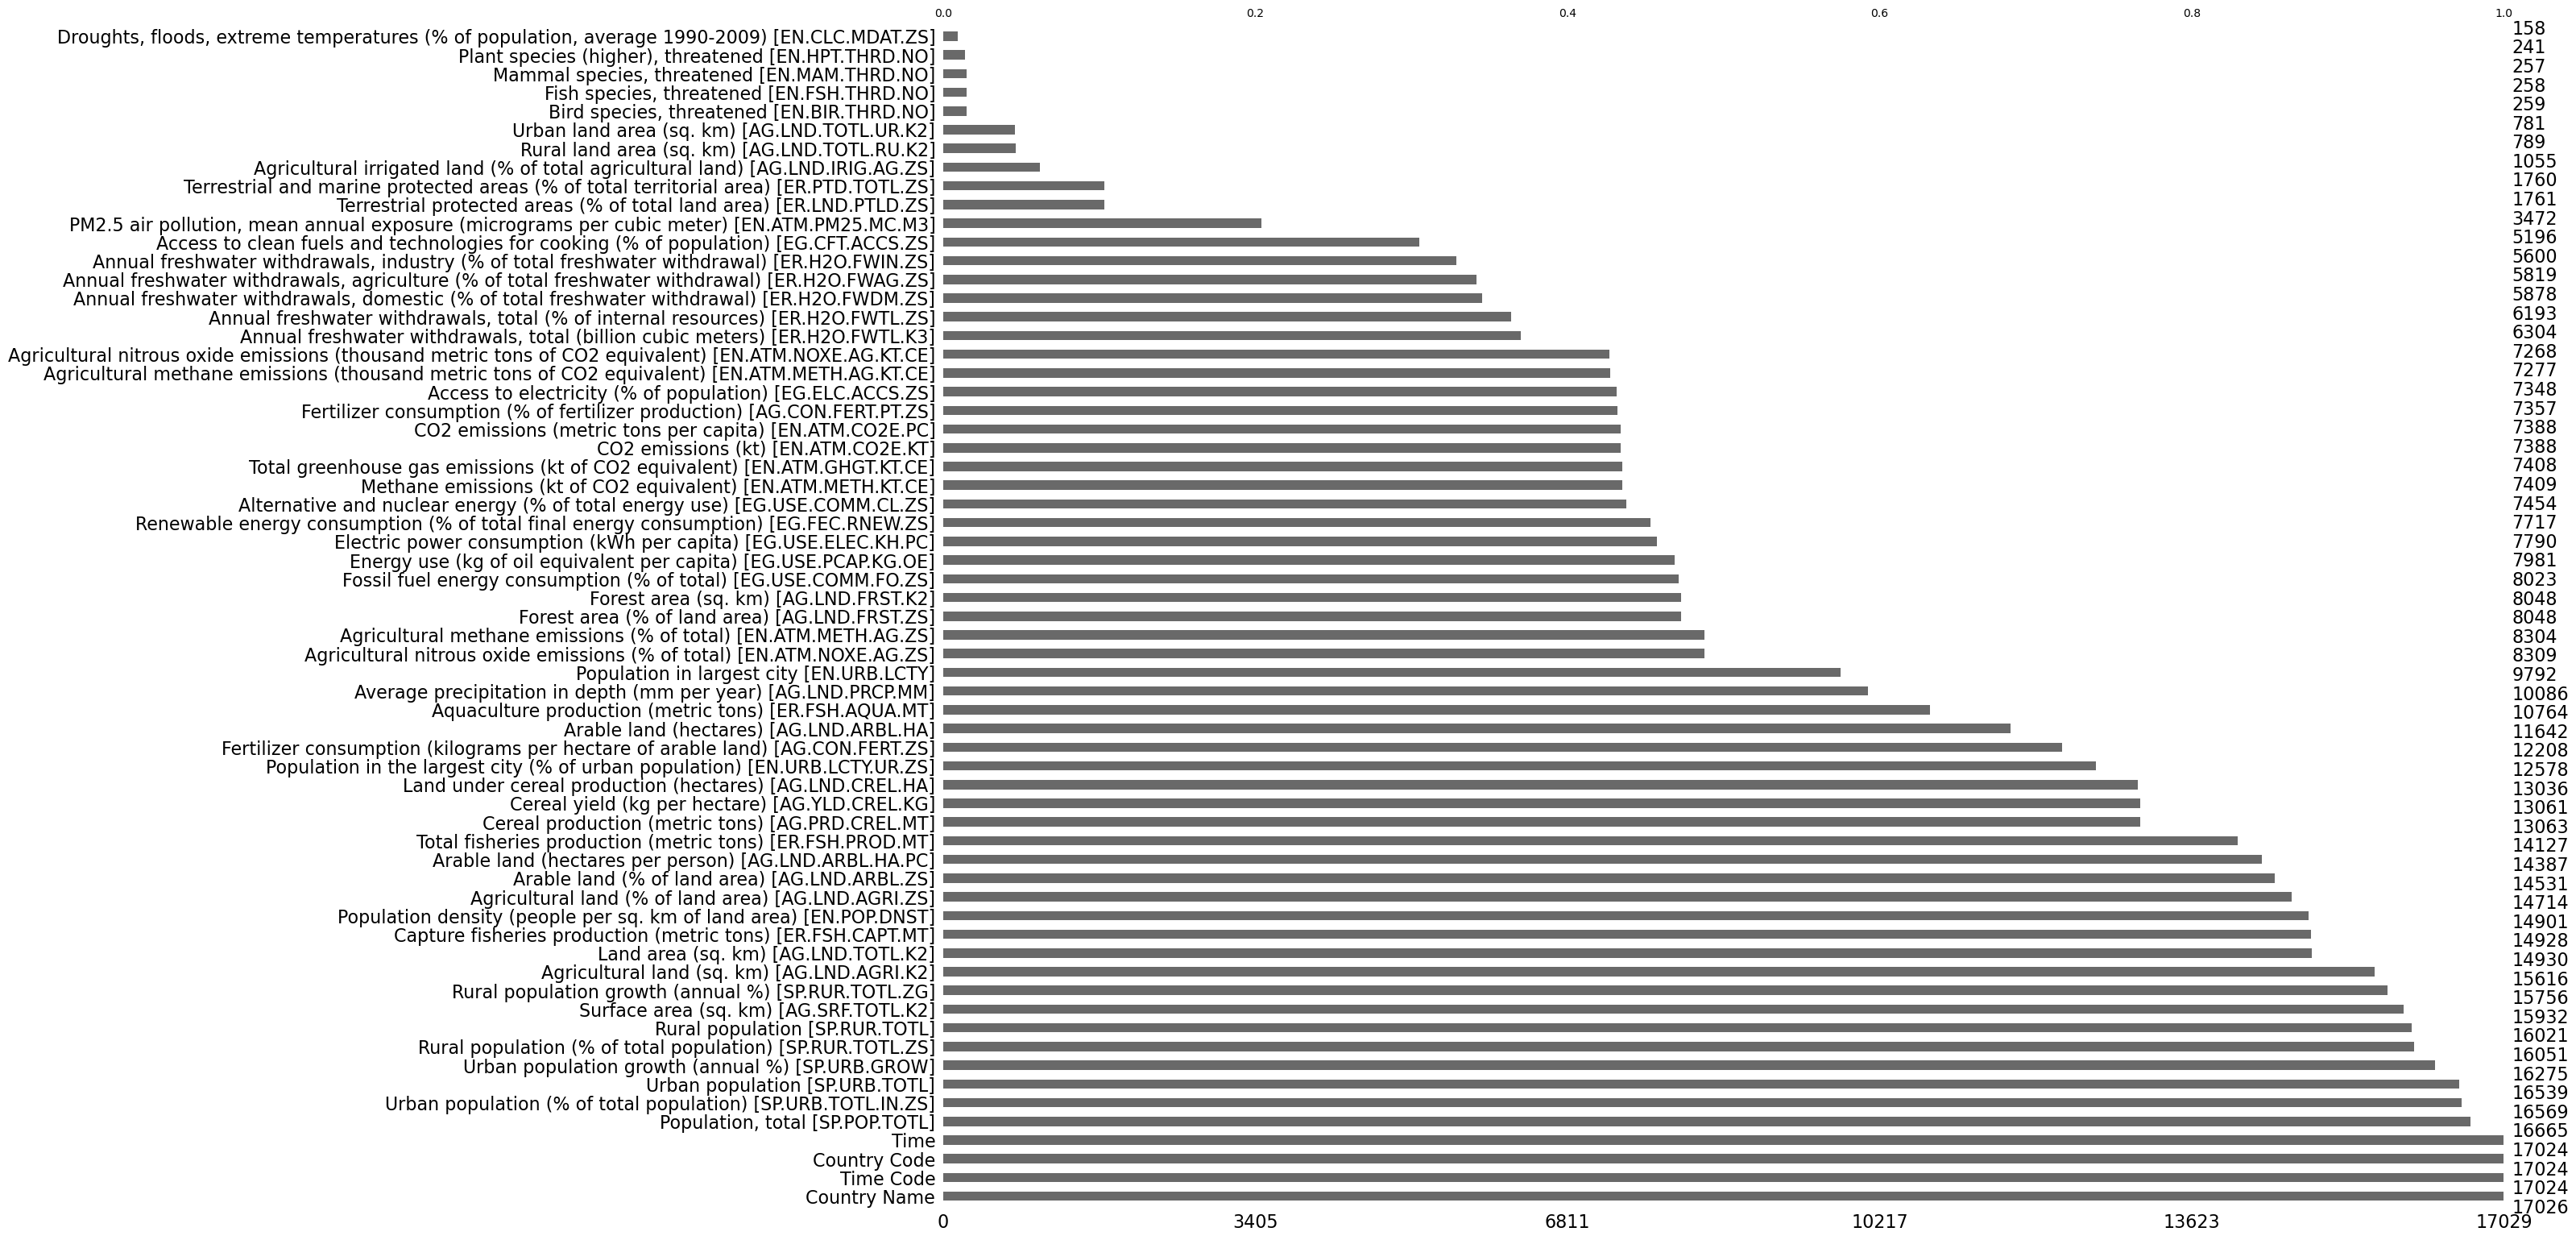

In [21]:
# inspección visual

msno.bar(df, sort= 'descending')

es consistente con los porcentajes del código anterior.

In [39]:
# Convertir la columna 'Time' a datetime
df['Time'] = pd.to_datetime(df['Time'], format='%Y')

<Axes: >

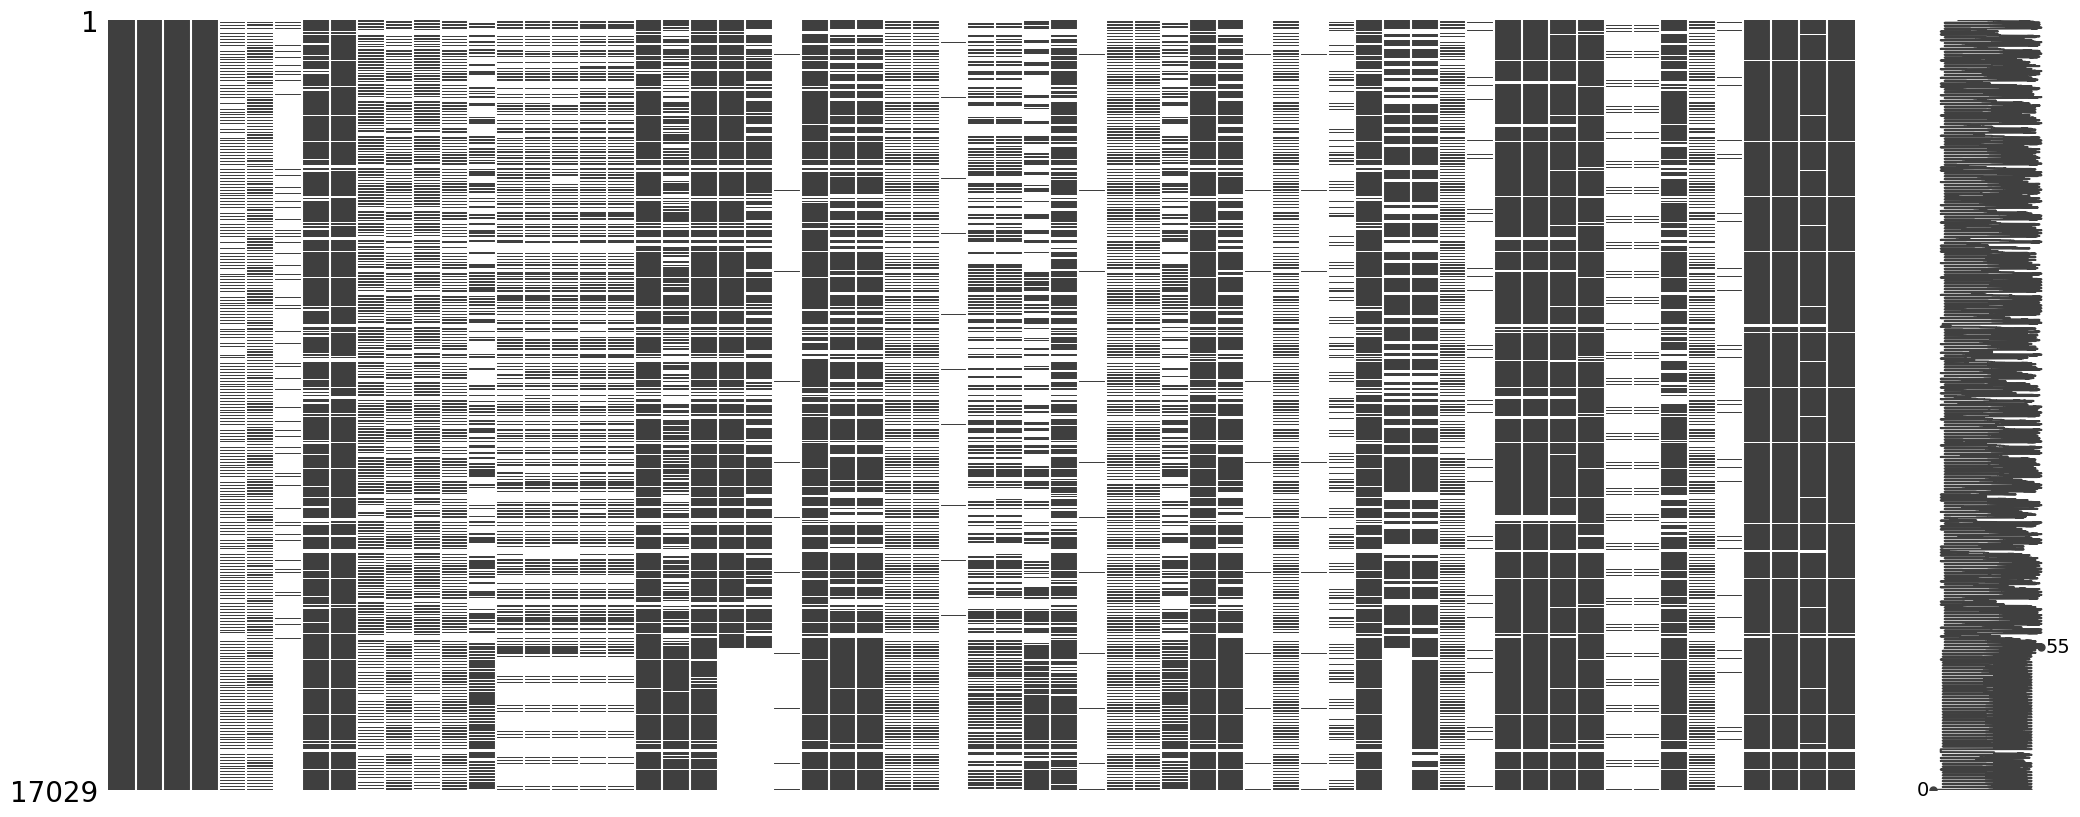

In [41]:
msno.matrix(df)



In [46]:
# columnas con más del 50% de MV

# Imprimir sólo las columnas con más del 50% de valores nulos
columnas_mas_del_50_nulos = porcenulos[porcenulos > 50]
print(columnas_mas_del_50_nulos.sort_values(ascending=False))


Droughts, floods, extreme temperatures (% of population, average 1990-2009) [EN.CLC.MDAT.ZS]            99.072171
Plant species (higher), threatened [EN.HPT.THRD.NO]                                                     98.584767
Mammal species, threatened [EN.MAM.THRD.NO]                                                             98.490810
Fish species, threatened [EN.FSH.THRD.NO]                                                               98.484937
Bird species, threatened [EN.BIR.THRD.NO]                                                               98.479065
Urban land area (sq. km) [AG.LND.TOTL.UR.K2]                                                            95.413706
Rural land area (sq. km) [AG.LND.TOTL.RU.K2]                                                            95.366727
Agricultural irrigated land (% of total agricultural land) [AG.LND.IRIG.AG.ZS]                          93.804686
Terrestrial and marine protected areas (% of total territorial area) [ER.PTD.TOTL.ZS]   